In [10]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [11]:
df = pd.read_csv('kayseri_houses_day1_processed2.csv')
df = df.drop(['Şehir'], axis=1)
df = df.drop(['Türü'], axis=1)

df.head()

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,Fiyat,İlçe,Mahalle
0,175,0,15,0,0,0,1,140,8,1,6,1,1,1900000,4,95
1,150,7,8,2,0,2,0,130,8,1,5,1,1,1300000,4,17
2,330,0,3,0,0,0,2,304,23,12,4,1,6,12500000,5,21
3,100,7,4,1,3,2,0,90,8,1,6,1,1,2320000,5,100
4,165,0,4,0,3,2,0,120,8,1,5,1,1,1450000,4,135


In [12]:
X = df.drop(['Fiyat'], axis=1)
y = df['Fiyat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
model_params = {
    'n_estimators': [100, 200, 1000, 2000],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.01, 0.02, 0.05, 0.09],
    'colsample_bytree': [0,4, 0.5, 0.6],
    'gamma': [0, 0.25, 0.5, 1.0],
    'subsample': [0.5, 0.6, 0.7, 0.8],
}

In [90]:
xgb0 = XGBRegressor()

In [91]:
grid_search = GridSearchCV(xgb0,
                           model_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

In [92]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 46080 candidates, totalling 230400 fits


KeyboardInterrupt: 

In [41]:
grid_search.best_params_

{'colsample_bytree': 0,
 'learning_rate': 0.02,
 'max_depth': 6,
 'n_estimators': 100}

In [57]:
xgb1 = XGBRegressor(colsample_bytree=0,
                    learning_rate=0.02,
                    max_depth=6,
                    n_estimators=100)

In [58]:
model_xgb = xgb1.fit(X_train, y_train)

In [59]:
model_xgb.predict(X_test)[1:6]  # predicted values

array([2156283.2, 2345263.2, 1451352.1, 1564961.2, 1869538.5],
      dtype=float32)

In [60]:
y_test[1:6]  #actual values

9       2580000
989     2455000
54      1180000
1073    1350000
1396    1575000
Name: Fiyat, dtype: int64

we compared the predicted and actual values in the two codes above.

In [61]:
model_xgb.score(X_test, y_test)

0.4805331589510171

In [62]:
model_xgb.score(X_train, y_train)

0.10794347277674265

In [63]:
y_pred = model_xgb.predict(X_test)[15:25]  # predicted values

In [64]:
np.sqrt(-1* cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error')).mean()

1596933.2025073206

In [65]:
importance = pd.DataFrame({'Importance': model_xgb.feature_importances_},
                          index=X_train.columns)
importance

,Importance
Brüt Metrekare,0.128009
Binanın Yaşı,0.083777
Binanın Kat Sayısı,0.044071
Kullanım Durumu,0.004271
Yapı Durumu,0.019748
Eşya Durumu,0.020743
Banyo Sayısı,0.144041
Net Metrekare,0.064579
Oda Sayısı,0.054620
Bulunduğu Kat,0.074513


<AxesSubplot:>

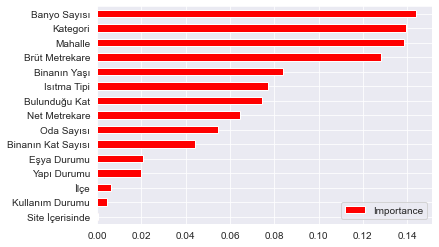

In [78]:
importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')

In [80]:
df.columns

Index(['Brüt Metrekare', 'Binanın Yaşı', 'Binanın Kat Sayısı',
       'Kullanım Durumu', 'Yapı Durumu', 'Eşya Durumu', 'Banyo Sayısı',
       'Net Metrekare', 'Oda Sayısı', 'Bulunduğu Kat', 'Isıtma Tipi',
       'Site İçerisinde', 'Kategori', 'Fiyat', 'İlçe', 'Mahalle'],
      dtype='object')

In [83]:
new_data = pd.DataFrame({'Brüt Metrekare': [150],
                         'Binanın Yaşı': [2],
                         'Binanın Kat Sayısı': [8],
                         'Kullanım Durumu': [2],
                         'Yapı Durumu': [2],
                         'Eşya Durumu': [1],
                         'Banyo Sayısı': [0],
                         'Net Metrekare': [130],
                         'Oda Sayısı': [11],
                         'Bulunduğu Kat': [1],
                         'Isıtma Tipi': [6],
                         'Site İçerisinde': [1],
                         'Kategori': [1],
                         'İlçe': [5],
                         'Mahalle': [11],
                        })
new_data

,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yapı Durumu,Eşya Durumu,Banyo Sayısı,Net Metrekare,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Site İçerisinde,Kategori,İlçe,Mahalle
0,150,2,8,2,2,1,0,130,11,1,6,1,1,5,11


In [84]:
y_pred = model_xgb.predict(new_data)  # predicted values
int(y_pred)

1452456

In [85]:
from joblib import dump
dump(model_xgb, 'house_price_prediction_xgb_model_new_data.joblib')

['house_price_prediction_xgb_model_new_data.joblib']